In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [ ]:
def primeFactors(n):
    factors = []
    
    # Handle 2's
    while n % 2 == 0:
        factors.append(2)
        n = n // 2
    
    # Handle odd numbers
    for i in range(3, int(math.sqrt(n)) + 1, 2):
        while n % i == 0:
            factors.append(i)
            n = n // i
    
    # If n is still > 2, it's prime
    if n > 2:
        factors.append(n)
    
    return factors

# Create all the data first
data = {i: [primeFactors(i)] for i in range(1, 10001)}

# Create DataFrame all at once
df = pd.DataFrame(data, index=[0])

# Example usage:
print("First 10 columns:")
print(df.iloc[:, :10])

In [ ]:
def count_prime_factors(max_num=1000):
    def get_prime_factors(n):
        factors = []
        
        # Handle 2's
        while n % 2 == 0:
            factors.append(2)
            n = n // 2
        
        # Handle odd numbers
        for i in range(3, int(math.sqrt(n)) + 1, 2):
            while n % i == 0:
                factors.append(i)
                n = n // i
        
        # If n is still > 2, it's prime
        if n > 2:
            factors.append(n)
            
        return factors
    
    # Create both dictionaries
    total_factors = {}
    unique_factors = {}
    
    for i in range(1, max_num + 1):
        factors = get_prime_factors(i)
        total_factors[i] = len(factors)
        unique_factors[i] = len(set(factors))
    
    return total_factors, unique_factors

# Get both dictionaries
total_count, unique_count = count_prime_factors(max_num=1000000)

In [ ]:
# plot the number of total factors and unique factors for each number
plt.scatter(total_count.keys(), total_count.values(), label="Total factors")
plt.scatter(unique_count.keys(), unique_count.values(), label="Unique factors")
plt.xscale("log")
plt.xlabel("Number")
plt.ylabel("Count")
plt.legend()
plt.show()

In [ ]:
# generate a binary string of length 3*n where each position is determnined by a random number (0 or 1)
def generate_binary_string(n):
    return "".join([str(np.random.randint(0, 2)) for _ in range(3 * n)])

# count the number of 1's in the binary string
def count_ones(s):
    return s.count("1")

count_ones(generate_binary_string(100))

In [ ]:
def chunk_binary_string(s):
    return [int(s[i:i+3], 2) for i in range(0, len(s), 3)]

values = chunk_binary_string(generate_binary_string(100))
np.mean(values)

#### Monkeys

In [2]:
# how many keystrokes until a monkey types the word 'cat' on a 26-letter keyboard
import numpy as np

def monkey_typing():
    keyboard = "abcdefghijklmnopqrstuvwxyz"
    target = "cat"
    n = 0
    while True:
        n += 1
        s = "".join([np.random.choice(list(keyboard)) for _ in range(len(target))])
        if s == target:
            return n

# repeat the experiment 1000 and take the average
# np.mean([monkey_typing() for _ in range(1000)])

In [ ]:
# how many keystrokes until a monkey types the word 'cat' on a 26-letter keyboard
# use geometric distribution wth p = 1/26^3
np.mean([np.random.geometric(p=1/26**3) for _ in range(1000)])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# generate a matrix of size n x n with with 0s and 1s randomly
def generate_matrix(n):
    return np.random.randint(0, 2, (n, n))

# gets the rank of the matrix
def get_rank(matrix):
    return np.linalg.matrix_rank(matrix)

# get the rank of M random 10x10 matrices
m = 10000
ranks = [get_rank(generate_matrix(10)) for _ in range(m)]
plt.hist(ranks, bins=range(11), density=True)
plt.title("Rank of 10x10 random 0/1 matrices")
plt.xlabel("Rank")
plt.ylabel("Count")
plt.show()

----

In [9]:
np.log(10000) / 10000

0.0009210340371976184

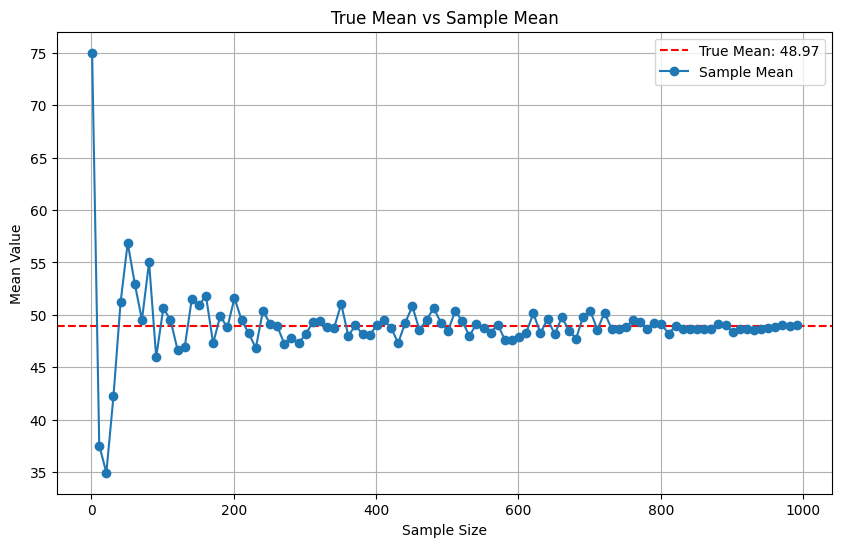

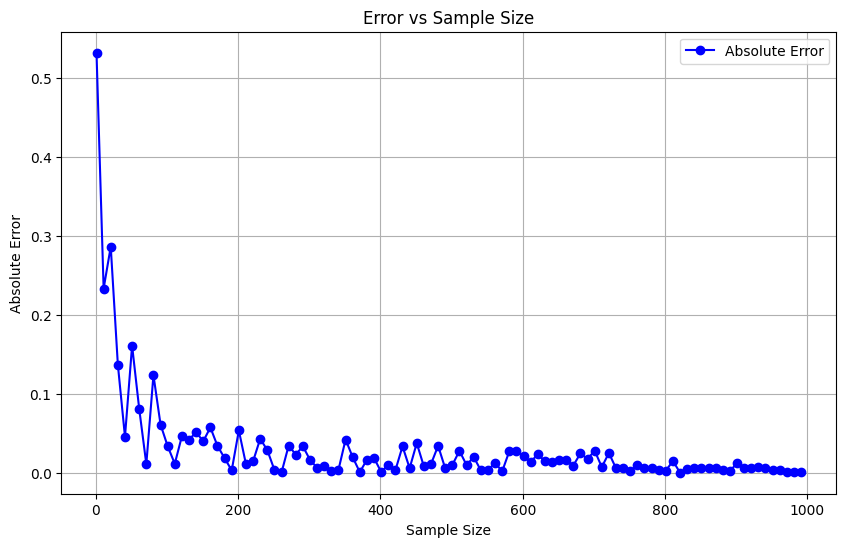

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Generate 1000 random numbers between 0 and 100
rand_nums = np.random.randint(0, 100, 1000)

# True mean of the dataset
true_mean = np.mean(rand_nums)

# Sample sizes to consider
sample_sizes = np.arange(1, 1001, 10)  # Taking steps of 10 for clarity

# Compute mean for each sample size
sample_means = [np.mean(np.random.choice(rand_nums, size=n, replace=False)) for n in sample_sizes]

# Plot the results
plt.figure(figsize=(10, 6))
plt.axhline(y=true_mean, color='r', linestyle='--', label=f'True Mean: {true_mean:.2f}')
plt.plot(sample_sizes, sample_means, marker='o', linestyle='-', label='Sample Mean')

plt.xlabel('Sample Size')
plt.ylabel('Mean Value')
plt.title('True Mean vs Sample Mean')
plt.legend()
plt.grid(True)
plt.show()

# Compute error as the absolute difference between sample mean and true mean
# errors = np.abs(np.array(sample_means) - true_mean)
# as a percentage
errors = np.abs(np.array(sample_means) - true_mean) / true_mean

# Plot the error as a function of sample size
plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, errors, marker='o', linestyle='-', color='b', label='Absolute Error')

plt.xlabel('Sample Size')
plt.ylabel('Absolute Error')
plt.title('Error vs Sample Size')
plt.legend()
plt.grid(True)
plt.show()